# Face Recognition with Intelligent Template Matching

This notebook demonstrates how to use <b>intelligent template matching</b> to identify target faces in images.

To get started, you must have the following requirements installed:

1. `opencv-python` - the official Python implementation of the OpenCV library
2. `face_recognition` - to work with face recognition
3. `numpy` - for loading images as arrays
4. `matplotlib` - for displaying results graphically
5. `notebook` - to run this notebook in a Jupyter server

It is recommended to have a virtual environment to isolate these requirements from the rest of your system. This can be done using Python's `virtualenv` package.

First, open a <b>Terminal</b> (<b>Command Prompt</b> on Windows) in the same foldand create a virtual environment:

```shell
python3 -m venv env
```

Next, activate the virtual environment. For Windows users:

```shell
.\env\Scripts\activate
```

For Linux and MacOS users:

```shell
source env/bin/activate
```

Now you can safely install the above requirements in your virtual environment:

```shell
pip install opencv-python face_recognition numpy matplotlib notebook
```

After installation is complete, launch the Jupyter server to edit this notebook:

```shell
jupyter notebook
```

## Getting Started

The following imports are necessary to work with this notebook:

In [4]:
# imports

import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

First things first, we must have two images to work with:

1. The <b>main image</b> - this contains multiple faces, out of which a target face must be identified.
2. The <b>target image</b> - this contains the face which must be identified in the main image.

Consider the following images of Timothée Chalamet as an example.

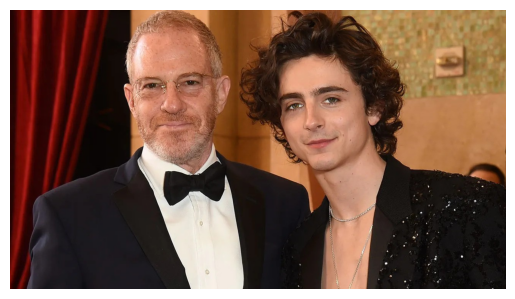

In [15]:
# load the main image from the disk
img = mpimg.imread("./img/timothee-main.jpg")

# display the loaded image
%matplotlib inline
plt.imshow(img)
plt.axis("off")
plt.show()

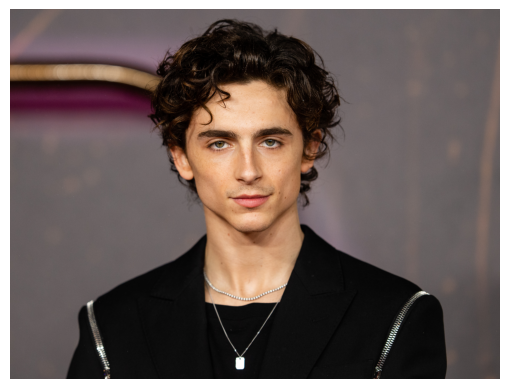

In [14]:
# load the target image from the disk
img = mpimg.imread("./img/timothee-target.jpg")

# display the loaded image
%matplotlib inline
plt.imshow(img)
plt.axis("off")
plt.show()

<b>NOTE</b> - `plt.axis("off")` is used to remove the axes from the image when it is displayed in the output.

## Face Recognition

Now, we can write a function to find the target face in the main image using <b>template matching</b>.

In [20]:
def compare_and_mark_faces(main_img_path, target_img_path):
    # load the main image and the target image from the disk
    main_img = face_recognition.load_image_file(main_img_path)
    target_img = face_recognition.load_image_file(target_img_path)

    # find face locations and face encodings for the main and target images
    main_face_locations = face_recognition.face_locations(main_img)
    target_face_locations = face_recognition.face_locations(target_img)
    
    main_face_encodings = face_recognition.face_encodings(main_img, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_img, target_face_locations)

    # create a copy of the main image for visualization
    main_img_marked = np.copy(main_img)

    # iterate through faces in the main image
    for main_face_location, main_face_encoding in zip(main_face_locations, main_face_encodings):
        # compare the face encoding with all face encodings in the target image
        results = face_recognition.compare_faces(target_face_encodings, main_face_encoding)

        # check if there is at least one match
        if True in results:
            # find the index of the first matching face in the target image
            target_index = results.index(True)

            # draw a blue bounding box around the matching face in the main image
            top, right, bottom, left = main_face_location
            cv2.rectangle(main_img_marked, (left, top), (right, bottom), (0, 0, 255), 2)

    # display the marked main image
    plt.imshow(main_img_marked)
    plt.axis("off")
    plt.show()

Finally, we can call this function with the two images of Timothée Chalamet to see how well it works.

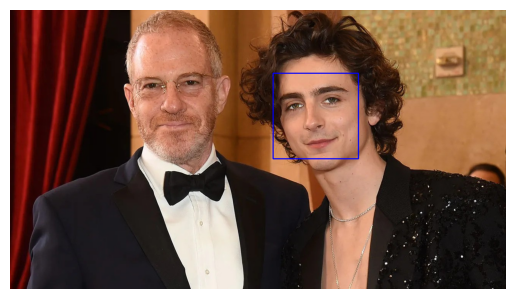

In [21]:
# specify the paths to the main image and the target image
main_image_path = "./img/timothee-main.jpg"
target_image_path = "./img/timothee-target.jpg"

# call function for compare images and mark the target face in the main image
compare_and_mark_faces(main_image_path, target_image_path)